In [15]:
#load in appropriate data and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#list 
years = ['GL1999.TXT','GL2000.TXT','GL2001.TXT','GL2002.TXT','GL2003.TXT','GL2004.TXT','GL2005.TXT','GL2006.TXT','GL2007.TXT',
            'GL2008.TXT','GL2009.TXT','GL2010.TXT','GL2011.TXT','GL2012.TXT','GL2013.TXT','GL2014.TXT','GL2015.TXT','GL2016.TXT',
            'GL2017.TXT','GL2018.TXT','GL2019.TXT']
#column indexs we will be using from the OG download file and new column names
coln = [3,5,6,8,9,10,11,12,16,17,18,21,22,23,24,25,26,30,31,32,37,49,50,51,52,53,54,58,59,60,65]
colname = ['visitor','vgn','home','hgn','vscore','hscore','outs','d/n','park','at','time','vab','vhit','v2b','v3b','vhr',
           'vrbi','vwalk','viwalk','vstrik','vlob','hab','hhit','h2b','h3b','hhr','hrbi','hwalk','hiwalk','hstrik','hlob']

year = np.arange(1999,2020)
#year

In [16]:
#creates empty dictionary for each years data frame to be stored in
mast= {}
for y in range(len(years)):
    mast['year{}'.format(y)] = pd.read_csv(years[y],sep=",",usecols= coln, names = colname)

mast['year0'].head()

,visitor,vgn,home,hgn,vscore,hscore,outs,d/n,park,at,...,hab,hhit,h2b,h3b,hhr,hrbi,hwalk,hiwalk,hstrik,hlob
0,COL,1,SDN,1,8,2,54,N,MNT01,27104,...,32,6,1,0,0,2,6,0,8,9
1,TBA,1,BAL,1,7,10,51,D,BAL12,46733,...,33,13,2,0,2,10,6,0,7,7
2,BOS,1,KCA,1,5,3,54,D,KAN06,40257,...,32,6,2,0,1,3,2,0,12,5
3,NYA,1,OAK,1,3,5,48,N,OAK01,46380,...,31,7,1,0,1,5,5,0,8,7
4,CHA,1,SEA,1,8,2,54,N,SEA02,51656,...,34,8,1,0,2,2,3,0,8,8


This cell utilizes a number of offensive statistics compared to number of at bats. This is the lowest common deniominator and serves to model the success rate of by a teams number of offensive opportunities. This cell also creates a ratio of number of hit types to number of total hits to gauge the dynamicism of a teams offensive. These ratios will serve as independant variables to our target variable win and we will also be able to plot, and examine how these ratios changed over time and how the dynamic changes in performance change relative to overall perfomrance. Ratios whose denominator are at bats are a measure of overall perfomance, ratios whose denominator are hits ar a measure of efficiency/dynamicism. The exception is LOB to hits which is a measure of the teams inefficiency. These variables have the potential to be susceptible to multicolinearity and will be weeded out as found out and as compared to the absolute value data frame.

In [17]:
#goc, adds ratios of success to the master data frame
#visitor'' batting average
for y in range(len(year)):
    a = 'year{}'.format(y)
    vavg = mast[a].iloc[:,12]/mast[a].iloc[:,11]
    #doubles out of at bats
    v2b_avg = mast[a].iloc[:,13] / mast[a].iloc[:,11]
    #doubles out of hits
    v2b_h = mast[a].iloc[:,13]/ mast[a].iloc[:,12]
    #triples out of at bats
    v3b_avg = mast[a].iloc[:,14] / mast[a].iloc[:,11]
    #triples out of hits
    v3b_h = mast[a].iloc[:,14]/mast[a].iloc[:,12]
    #home runs out of at bats
    vhr_avg = mast[a].iloc[:,15]/ mast[a].iloc[:,11]
    #home runs out of hits
    vhr_h = mast[a].iloc[:,15]/ mast[a].iloc[:,12]
    #RBIs, runs batted in per hits, a measure of efficiency/dynamicism of a teams offense
    vrbi_h = mast[a].iloc[:,16] / mast[a].iloc[:,12]
    #walks per at bat, a measure of how patient the team is, or how lucky. Its a truthful stat
    vw_ab = mast[a].iloc[:,17]/ mast[a].iloc[:,11]
    #Intentional walk per at bat, a measure of how feared a team is
    viw_ab = mast[a].iloc[:,18]/mast[a].iloc[:,11]
    #strikeouts per at bat
    vso_ab = mast[a].iloc[:,19]/mast[a].iloc[:,11]
    #tells us how many hits that resulted in outs, in a way this is the measure of the teams potential.
    vmh_ab = (mast[a].iloc[:,11] - (mast[a].iloc[:,19] + mast[a].iloc[:,12])) / mast[a].iloc[:,11]
    #the number lob per hits, a measure of a teams inefficiency 
    vlob_avg = mast[a].iloc[:,20]/(mast[a].iloc[:,11])

    #home'' batting average
    havg = mast[a].iloc[:,22]/mast[a].iloc[:,21]
    #doubles out of at bats
    h2b_avg = mast[a].iloc[:,23] / mast[a].iloc[:,21]
    #doubles out of hits
    h2b_h = mast[a].iloc[:,23]/ mast[a].iloc[:,22]
    #triples out of at bats
    h3b_avg = mast[a].iloc[:,24] / mast[a].iloc[:,21]
    #triples out of hits
    h3b_h = mast[a].iloc[:,24]/mast[a].iloc[:,22]
    #home runs out of at bats
    hhr_avg = mast[a].iloc[:,25]/ mast[a].iloc[:,21]
    #home runs out of hits
    hhr_h = mast[a].iloc[:,25]/ mast[a].iloc[:,22]
    #RBIs, runs batted in per hits, a measure of efficiency/dynamicism of a teams offense
    hrbi_h = mast[a].iloc[:,26] / mast[a].iloc[:,22]
    #walks per at bat, a measure of how patient the team is, or how lucky. Its a truthful stat
    hw_ab = mast[a].iloc[:,27]/ mast[a].iloc[:,21]
    #Intentional walk per at bat, a measure of how feared a team is
    hiw_ab = mast[a].iloc[:,28]/mast[a].iloc[:,21]
    #strikeouts per at bat
    hso_ab = mast[a].iloc[:,29]/mast[a].iloc[:,21]
    #tells us how many hits that resulted in outs, in a way this is the measure of the teams potential.
    hmh_ab = (mast[a].iloc[:,21] - (mast[a].iloc[:,29] + mast[a].iloc[:,22])) / mast[a].iloc[:,21]
    #the number lob per hits, a measure of a teams inefficiency 
    hlob_avg = mast[a].iloc[:,30]/(mast[a].iloc[:,21])
    #measure of total runs scored by either team
    total = mast[a].iloc[:,4] + mast[a].iloc[:,5]
    #adds ratios as columns
    cnames = ['vavg','v2ba','v2bh','v3ba','v3bh','vhra','vhrh','vrbih','vwa','viwa','vsoa','vfoa','vloba','havg','h2ba','h2bh',
              'h3ba','h3bh','hhra','hhrh','hrbih','hwa','hiwa','hsoa','hfoa','hloba','totals']
    values = [vavg, v2b_avg,v2b_h,v3b_avg,v3b_h,vhr_avg,vhr_h,vrbi_h,vw_ab,viw_ab,vso_ab,vmh_ab,vlob_avg,havg,h2b_avg,h2b_h,
              h3b_avg,h3b_h,hhr_avg,hhr_h,hrbi_h,hw_ab,hiw_ab,hso_ab,hmh_ab,hlob_avg,total]
    for c in range(len(cnames)):
        mast[a][cnames[c]]= values[c]

In [18]:
#mast['year0'].head()

The largest obstacle to the construction of our model was the organization of the data. The first step to overcoming this problem was to add a column designating the winner and loser of each game, in order to initate the process of isolating our target variable.

In [19]:
#creates a columns designating the winner and loser
for y in range(len(year)):
    a = 'year{}'.format(y)
    winner = []
    loser = []
    for i in range(len(mast[a].iloc[:,0])):
        if mast[a].iloc[i,5] > mast[a].iloc[i,4]:
            winner.append(mast[a].iloc[i,2])
            loser.append(mast[a].iloc[i,0])
        else:
            winner.append(mast[a].iloc[i,0])
            loser.append(mast[a].iloc[i,0])
    mast[a]['winr'] = winner
    mast[a]['losr'] = loser
mast['year2'].head()

,visitor,vgn,home,hgn,vscore,hscore,outs,d/n,park,at,...,hhrh,hrbih,hwa,hiwa,hsoa,hfoa,hloba,totals,winr,losr
0,TEX,1,TOR,1,1,8,51,D,SJU01,19891,...,0.153846,0.615385,0.055556,0.000000,0.194444,0.444444,0.194444,9,TOR,TEX
1,BOS,1,BAL,1,1,2,63,D,BAL12,46547,...,0.000000,0.333333,0.058824,0.000000,0.264706,0.558824,0.147059,3,BAL,BOS
2,CHA,1,CLE,1,7,4,54,D,CLE08,42606,...,0.428571,0.571429,0.064516,0.000000,0.193548,0.580645,0.129032,11,CHA,CHA
3,KCA,1,NYA,1,3,7,51,D,NYC16,55814,...,0.230769,0.538462,0.083333,0.000000,0.083333,0.555556,0.222222,10,NYA,KCA
4,OAK,1,SEA,1,4,5,51,N,SEA03,45911,...,0.000000,0.714286,0.357143,0.107143,0.285714,0.464286,0.428571,9,SEA,OAK


In [20]:
#creates a column for the year a given game was played in
for i in range(len(years)):
    num = len(mast['year{}'.format(i)]['visitor'])
    lis = []
    for b in range(num):
        lis.append(year[i])
    mast['year{}'.format(i)]['year'] = lis

#mast['year1']['year']

In [21]:
teams = mast['year0'].iloc[:,2].unique()
tn = len(teams) 
print(teams)
print(tn)

['SDN' 'BAL' 'KCA' 'OAK' 'SEA' 'TEX' 'ATL' 'CIN' 'FLO' 'LAN' 'PIT' 'SLN'
 'ANA' 'MIN' 'HOU' 'MON' 'SFN' 'CHA' 'NYA' 'TBA' 'CLE' 'DET' 'TOR' 'ARI'
 'CHN' 'COL' 'NYN' 'PHI' 'BOS' 'MIL']
30


In [22]:
#combines all years into a single dataframe
alpha = pd.concat(mast, ignore_index= True)
#paints a picture of the data
alpha.describe()

,vgn,hgn,vscore,hscore,outs,at,time,vab,vhit,v2b,...,hhra,hhrh,hrbih,hwa,hiwa,hsoa,hfoa,hloba,totals,year
count,51016.000000,51016.000000,51016.000000,51016.000000,51016.000000,51014.000000,51016.000000,51016.000000,51016.000000,51016.000000,...,51016.000000,50989.000000,5.099000e+04,51016.000000,51016.000000,51016.000000,51016.000000,51016.000000,51016.000000,51016.000000
mean,81.476929,81.479281,4.531814,4.663184,53.549396,30060.129866,178.787204,35.010212,8.963110,1.791320,...,0.031795,0.122753,inf,0.099544,0.007216,0.205749,0.534389,0.206318,9.194998,2009.001078
std,46.753375,46.751975,3.211028,3.135077,4.961993,11082.730056,27.615546,4.365767,3.578872,1.413495,...,0.031710,0.126272,NaN,0.063629,0.015648,0.086785,0.095001,0.069027,4.579138,6.055021
min,1.000000,1.000000,0.000000,0.000000,27.000000,0.000000,75.000000,14.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.142857,0.000000,1.000000,1999.000000
25%,41.000000,41.000000,2.000000,2.000000,51.000000,21352.000000,161.000000,32.000000,6.000000,1.000000,...,0.000000,0.000000,3.000000e-01,0.057143,0.000000,0.142857,0.470588,0.161290,6.000000,2004.000000
50%,82.000000,81.000000,4.000000,4.000000,54.000000,30534.000000,176.000000,34.000000,9.000000,2.000000,...,0.029412,0.111111,5.000000e-01,0.090909,0.000000,0.200000,0.531250,0.205882,9.000000,2009.000000
75%,122.000000,122.000000,6.000000,6.000000,54.000000,38952.000000,193.000000,37.000000,11.000000,3.000000,...,0.054054,0.200000,6.363636e-01,0.137931,0.000000,0.258065,0.600000,0.250000,12.000000,2014.000000
max,163.000000,163.000000,30.000000,25.000000,132.000000,61707.000000,426.000000,76.000000,29.000000,11.000000,...,0.228571,1.000000,inf,0.481481,0.151515,0.657143,0.923077,0.566667,36.000000,2019.000000


In [23]:
alpha.head()


,visitor,vgn,home,hgn,vscore,hscore,outs,d/n,park,at,...,hrbih,hwa,hiwa,hsoa,hfoa,hloba,totals,winr,losr,year
0,COL,1,SDN,1,8,2,54,N,MNT01,27104.0,...,0.333333,0.187500,0.0,0.250000,0.562500,0.281250,10,COL,COL,1999
1,TBA,1,BAL,1,7,10,51,D,BAL12,46733.0,...,0.769231,0.181818,0.0,0.212121,0.393939,0.212121,17,BAL,TBA,1999
2,BOS,1,KCA,1,5,3,54,D,KAN06,40257.0,...,0.500000,0.062500,0.0,0.375000,0.437500,0.156250,8,BOS,BOS,1999
3,NYA,1,OAK,1,3,5,48,N,OAK01,46380.0,...,0.714286,0.161290,0.0,0.258065,0.516129,0.225806,8,OAK,NYA,1999
4,CHA,1,SEA,1,8,2,54,N,SEA02,51656.0,...,0.250000,0.088235,0.0,0.235294,0.529412,0.235294,10,CHA,CHA,1999


In [45]:
win = {}
for t in range(tn):
        win['team{}'.format(t)] = {'wint':[],'loss':[],'v':[],'team':[],'other':[],'year':[],'d/n':[],'park':[],
                                   'att':[],'totalr':[],'time':[]}
        
#iterates through each year
for y in range(len(years)):
    #masks the master dataframe to include only values equaling the given year
    beta = alpha[alpha['year'] == year[y]]
    #iterates through each team
    for t in range(tn):
        #masks the year dataframe to include only the games for the given team
        alphas = beta[(beta['visitor'] == teams[t]) | (beta['home'] == teams[t])]
        #initalized games won and games lost to 0 for each team and each season
        gl = 0
        gw = 0
        #iterates through every value of the masked dataframe
        for b in range(len(alphas['winr'])):
            win["team{}".format(t)]['d/n'].append(alphas.iloc[b,ref['d/n']])
            win["team{}".format(t)]['park'].append(alphas.iloc[b,ref['park']])
            win["team{}".format(t)]['att'].append(alphas.iloc[b,ref['at']])
            win["team{}".format(t)]['totalr'].append(alphas.iloc[b,ref['totals']])
            win["team{}".format(t)]['time'].append(alphas.iloc[b,ref['time']])
            #if the team is the winner append accordingly
            if teams[t] == alphas.iloc[b,-3]:
                gw = gw + 1
                gl = gl + 0
                win['team{}'.format(t)]['wint'].append(gw)
                win['team{}'.format(t)]['loss'].append(gl)
                win['team{}'.format(t)]['team'].append(teams[t])
                win['team{}'.format(t)]['v'].append(1)
                win['team{}'.format(t)]['other'].append(alphas.iloc[b,-2])
                win['team{}'.format(t)]['year'].append(alphas.iloc[b,-1])
            #if the team is the loser append accordingly
            else:
                gl = gl + 1
                gw = gw + 0
                win['team{}'.format(t)]['wint'].append(gw)
                win['team{}'.format(t)]['loss'].append(gl)
                win['team{}'.format(t)]['team'].append(teams[t])
                win['team{}'.format(t)]['v'].append(0)
                win['team{}'.format(t)]['other'].append(alphas.iloc[b,-3])
                win['team{}'.format(t)]['year'].append(alphas.iloc[b,-1])

In [46]:
#initalizes empty dictionary to store win data
wins = {}
#converts each dict value to a data frame stored by team
for i in range(tn):
     wins['team{}'.format(i)] = pd.DataFrame.from_dict(win['team{}'.format(i)])
#teamw[0]

In [47]:
#initalizes list of home and visiting team column headers
hoff = ['h2b','h3b','hhr','hrbi','hlob']
voff = ['v2b','v3b','vhr','vrbi','vlob']
same = ['2b','3b','hr','rbi','lob']
other = ['2b_a','3b_a','hr_a','rbi_a','lob_a']

In [48]:
#creates list of column headers
col = list(alpha.columns)
#creates index values correspoding to columns 
ind = np.arange(0,len(alpha.columns)+1)
#creates dictionary for referencing columns by iloc using column name
ref = dict(zip(col, ind)) 
#ref['vscore']

In [49]:
absol = {}

for t in range(tn):
    absol["team{}".format(t)] = {'runs_t':[],'hits_t':[],'runa_t':[],'hita_t':[],'hit':[],'2b':[],'3b':[],'hr':[],'rbi':[],
                                 'lob':[],'hit_a':[],'2b_a':[],'3b_a':[],'hr_a':[],'rbi_a':[],'lob_a':[],'gn':[],'year':[]}
        
#iterates through each year
for y in range(len(years)):
    #masks the master dataframe to include only values equaling the given year
    beta = alpha[alpha['year'] == year[y]]
    #iterates through each team            
    for t in range(tn):
        #masks the year dataframe to include only the games for the given team
        alphas = beta[(beta['visitor'] == teams[t]) | (beta['home'] == teams[t])]
        #initalizes hit totals and run totals for and against for each year and each team
        run = 0
        hit = 0
        run_a = 0
        hit_a = 0
        #iterates through masked dataframe
        for b in range(len(alphas.iloc[:,-1])):
            #if the team is home append accodingly
            if teams[t] == alphas.iloc[b,2]:
                absol["team{}".format(t)]['gn'].append(alphas.iloc[b,3])
                absol["team{}".format(t)]['year'].append(alphas.iloc[b,ref['year']]) 
                a = alphas.iloc[b,ref['hscore']]
                z = alphas.iloc[b,ref['hhit']]
                e = alphas.iloc[b,ref['vscore']]
                f = alphas.iloc[b,ref['vhit']]
                run = run + a
                hit = hit + z
                run_a = run_a + e
                hit_a = hit_a +f
                absol["team{}".format(t)]['runs_t'].append(run)
                absol["team{}".format(t)]['hits_t'].append(hit)
                absol["team{}".format(t)]['runa_t'].append(run_a)
                absol["team{}".format(t)]['hita_t'].append(hit_a)
                absol["team{}".format(t)]['hit'].append(z)
                absol["team{}".format(t)]['hit_a'].append(f)
                #Iterates through column values to avoid hardcoding
                for i in range(len(hoff)):
                    absol["team{}".format(t)][same[i]].append(alphas.iloc[b,ref[hoff[i]]])
                    absol["team{}".format(t)][other[i]].append(alphas.iloc[b,ref[voff[i]]])
            #if the team is visitor append accordingly
            else:
                absol["team{}".format(t)]['gn'].append(alphas.iloc[b,1])
                absol["team{}".format(t)]['year'].append(alphas.iloc[b,ref['year']]) 
                c = alphas.iloc[b,ref['vscore']]
                d  = alphas.iloc[b,ref['vhit']]
                g = alphas.iloc[b,ref['hscore']]
                h = alphas.iloc[b,ref['hhit']]
                run = run + c
                hit = hit + d
                run_a = run_a + g
                hit_a = hit_a + h
                absol["team{}".format(t)]['runs_t'].append(run)
                absol["team{}".format(t)]['hits_t'].append(hit)
                absol["team{}".format(t)]['runa_t'].append(run_a)
                absol["team{}".format(t)]['hita_t'].append(hit_a)
                absol["team{}".format(t)]['hit'].append(d)
                absol["team{}".format(t)]['hit_a'].append(h)
                for i in range(len(hoff)):
                    absol["team{}".format(t)][same[i]].append(alphas.iloc[b,ref[voff[i]]])
                    absol["team{}".format(t)][other[i]].append(alphas.iloc[b,ref[hoff[i]]])

In [50]:
#creates empty dict for storing absolute values, num of hits
tabs = {}
#converts each dict values to a data frame 
for i in range(tn):
    tabs['team{}'.format(i)] = pd.DataFrame.from_dict(absol['team{}'.format(i)])
#tabs['team0']

In [51]:
vteamv =['vavg','v2ba','v2bh','v3ba','v3bh','vhra','vhrh','vrbih','vwa','viwa','vsoa','vfoa',
         'vloba','havg','hhra','hhrh','hrbih','hwa','hsoa','hfoa','hloba','vgn']
hteamv= ['havg','h2ba','h2bh','h3ba','h3bh','hhra','hhrh','hrbih','hwa','hiwa','hsoa','hfoa',
         'hloba','vavg','vhra','vhrh','vrbih','vwa','vsoa','vfoa','vloba','hgn']
average = ['avg','2ba','2bh','3ba','3bh','hra','hrh','rbih','wa','iwa','soa','foa','loba',
           'avgo','hrao','hrho','rbiho','wao','soao','foao','lobao']
avg= {}
for t in range(tn):
    avg["team{}".format(t)] = {'avg':[],'2ba':[],'2bh':[],'3ba':[],'3bh':[],'hra':[],'hrh':[],'rbih':[],'wa':[],'iwa':[],
                               'soa':[],'foa':[],'loba':[],'avgo':[],'hrao':[],'hrho':[],'rbiho':[],'wao':[],'soao':[],
                               'foao':[],'lobao':[]}

#avg
for y in range(len(years)):
    #masks the master dataframe to include only values equaling the given year
    beta = alpha[alpha['year'] == year[y]]    
    for t in range(tn):
        #masks the year dataframe to include only the games for the given team
        alphas = beta[(beta['visitor'] == teams[t]) | (beta['home'] == teams[t])]
        for b in range(len(alphas.iloc[:,-1])):
            if teams[t] == alphas.iloc[b,ref['home']]:
                for i in range(len(average)):
                    a = alphas.iloc[b,ref[hteamv[i]]]
                    avg["team{}".format(t)][average[i]].append(a)
            else:
                for i in range(len(average)):
                    c = alphas.iloc[b,ref[vteamv[i]]]
                    avg["team{}".format(t)][average[i]].append(c)

In [52]:
#creates empty dict for storing realtive values, num of hits per at bat
tavg = {}
#converts each dict values to a data frame 
for i in range(tn):
    tavg['team{}'.format(i)] = pd.DataFrame.from_dict(avg['team{}'.format(i)])
#tavg['team0']

In [53]:
#combines all teams win data
dfwin = pd.concat(wins,ignore_index=True)
#all values across dicts for each team have the same relative place
#key reates a range encompassing each value to be used for merging
key = range(98310)
dfwin['key'] = key
dfwin.head()

,wint,loss,v,team,other,year,d/n,park,att,totalr,time,key
0,0,1,0,SDN,COL,1999,N,MNT01,27104.0,10,190,0
1,1,1,1,SDN,COL,1999,D,SAN01,61247.0,7,165,1
2,2,1,1,SDN,COL,1999,N,SAN01,32751.0,3,139,2
3,2,2,0,SDN,SFN,1999,D,SFO02,57430.0,16,208,3
4,2,3,0,SDN,SFN,1999,N,SFO02,15795.0,11,165,4


In [54]:
#combines all teams absolute data
dfabs = pd.concat(tabs,ignore_index=True)
dfabs['key'] = key
dfabs.head()

,runs_t,hits_t,runa_t,hita_t,hit,2b,3b,hr,rbi,lob,hit_a,2b_a,3b_a,hr_a,rbi_a,lob_a,gn,year,key
0,2,6,8,18,6,1,0,0,2,9,18,1,0,1,8,10,1,1999,0
1,6,15,11,27,9,1,0,0,3,5,9,3,0,0,2,10,2,1999,1
2,8,23,12,35,8,1,0,1,2,6,8,4,0,0,1,5,3,1999,2
3,12,32,24,51,9,4,0,0,4,12,16,2,0,3,12,9,4,1999,3
4,15,40,32,62,8,1,0,1,3,5,11,3,1,0,7,7,5,1999,4


In [55]:
#combines all teams relative data
dfavg = pd.concat(tavg,ignore_index=True)
dfavg['key'] = key
dfavg.head()

,avg,2ba,2bh,3ba,3bh,hra,hrh,rbih,wa,iwa,...,loba,avgo,hrao,hrho,rbiho,wao,soao,foao,lobao,key
0,0.187500,0.031250,0.166667,0.0,0.0,0.000000,0.000,0.333333,0.187500,0.0,...,0.281250,0.428571,0.02381,0.055556,0.444444,0.047619,0.142857,0.428571,0.238095,0
1,0.290323,0.032258,0.111111,0.0,0.0,0.000000,0.000,0.333333,0.064516,0.0,...,0.161290,0.257143,0.00000,0.000000,0.222222,0.114286,0.257143,0.485714,0.285714,1
2,0.275862,0.034483,0.125000,0.0,0.0,0.034483,0.125,0.250000,0.103448,0.0,...,0.206897,0.258065,0.00000,0.000000,0.125000,0.064516,0.032258,0.709677,0.161290,2
3,0.264706,0.117647,0.444444,0.0,0.0,0.000000,0.000,0.444444,0.205882,0.0,...,0.352941,0.400000,0.07500,0.187500,0.750000,0.100000,0.075000,0.525000,0.225000,3
4,0.242424,0.030303,0.125000,0.0,0.0,0.030303,0.125,0.375000,0.060606,0.0,...,0.151515,0.333333,0.00000,0.000000,0.636364,0.121212,0.212121,0.454545,0.212121,4


In [56]:
#merges win/target variables with independant relative variables
dfavgs = pd.merge(dfwin,dfavg, how='outer', on = 'key')
dfavgs.head()

,wint,loss,v,team,other,year,d/n,park,att,totalr,...,foa,loba,avgo,hrao,hrho,rbiho,wao,soao,foao,lobao
0,0,1,0,SDN,COL,1999,N,MNT01,27104.0,10,...,0.562500,0.281250,0.428571,0.02381,0.055556,0.444444,0.047619,0.142857,0.428571,0.238095
1,1,1,1,SDN,COL,1999,D,SAN01,61247.0,7,...,0.483871,0.161290,0.257143,0.00000,0.000000,0.222222,0.114286,0.257143,0.485714,0.285714
2,2,1,1,SDN,COL,1999,N,SAN01,32751.0,3,...,0.517241,0.206897,0.258065,0.00000,0.000000,0.125000,0.064516,0.032258,0.709677,0.161290
3,2,2,0,SDN,SFN,1999,D,SFO02,57430.0,16,...,0.411765,0.352941,0.400000,0.07500,0.187500,0.750000,0.100000,0.075000,0.525000,0.225000
4,2,3,0,SDN,SFN,1999,N,SFO02,15795.0,11,...,0.545455,0.151515,0.333333,0.00000,0.000000,0.636364,0.121212,0.212121,0.454545,0.212121


In [57]:
#merges win/target variables with independant absolute variables
dfints = pd.merge(dfwin,dfabs,how='outer',on = 'key')
dfints.head()

,wint,loss,v,team,other,year_x,d/n,park,att,totalr,...,rbi,lob,hit_a,2b_a,3b_a,hr_a,rbi_a,lob_a,gn,year_y
0,0,1,0,SDN,COL,1999,N,MNT01,27104.0,10,...,2,9,18,1,0,1,8,10,1,1999
1,1,1,1,SDN,COL,1999,D,SAN01,61247.0,7,...,3,5,9,3,0,0,2,10,2,1999
2,2,1,1,SDN,COL,1999,N,SAN01,32751.0,3,...,2,6,8,4,0,0,1,5,3,1999
3,2,2,0,SDN,SFN,1999,D,SFO02,57430.0,16,...,4,12,16,2,0,3,12,9,4,1999
4,2,3,0,SDN,SFN,1999,N,SFO02,15795.0,11,...,3,5,11,3,1,0,7,7,5,1999


In [58]:
#drops redundant year column
dfints = dfints.drop(columns = ['year_y'])

In [59]:
#adds game number for each team for reference
dfavgs['gn'] = dfints.iloc[:,-1]
#dfavgs.head()
dfints.head()

,wint,loss,v,team,other,year_x,d/n,park,att,totalr,...,hr,rbi,lob,hit_a,2b_a,3b_a,hr_a,rbi_a,lob_a,gn
0,0,1,0,SDN,COL,1999,N,MNT01,27104.0,10,...,0,2,9,18,1,0,1,8,10,1
1,1,1,1,SDN,COL,1999,D,SAN01,61247.0,7,...,0,3,5,9,3,0,0,2,10,2
2,2,1,1,SDN,COL,1999,N,SAN01,32751.0,3,...,1,2,6,8,4,0,0,1,5,3
3,2,2,0,SDN,SFN,1999,D,SFO02,57430.0,16,...,0,4,12,16,2,0,3,12,9,4
4,2,3,0,SDN,SFN,1999,N,SFO02,15795.0,11,...,1,3,5,11,3,1,0,7,7,5


In [60]:
dfavgs.to_csv('mlb20yr_avgs.csv')
dfints.to_csv('mlb20yr_abs.csv')

In [167]:
#dfints.describe()
dfavgs.head()

,wint,loss,v,team,other,year,d/n,park,att,totalr,...,loba,avgo,hrao,hrho,rbiho,wao,soao,foao,lobao,gn
0,0,1,0,SDN,COL,1999,N,MNT01,27104.0,10,...,0.281250,0.428571,0.02381,0.055556,0.444444,0.047619,0.142857,0.428571,0.238095,1
1,1,1,1,SDN,COL,1999,D,SAN01,61247.0,7,...,0.161290,0.257143,0.00000,0.000000,0.222222,0.114286,0.257143,0.485714,0.285714,2
2,2,1,1,SDN,COL,1999,N,SAN01,32751.0,3,...,0.206897,0.258065,0.00000,0.000000,0.125000,0.064516,0.032258,0.709677,0.161290,3
3,2,2,0,SDN,SFN,1999,D,SFO02,57430.0,16,...,0.352941,0.400000,0.07500,0.187500,0.750000,0.100000,0.075000,0.525000,0.225000,4
4,2,3,0,SDN,SFN,1999,N,SFO02,15795.0,11,...,0.151515,0.333333,0.00000,0.000000,0.636364,0.121212,0.212121,0.454545,0.212121,5


In [139]:
park_avg = pd.pivot_table(dfints,'att',('year_x','park'))
park_abs = pd.pivot_table(dfints,'att',('year_x','park'),aggfunc=np.sum)
year_avg = pd.pivot_table(dfints, ('att','totalr','hit','hit_a','hr','hr_a'),'year_x')
year_sum = pd.pivot_table(dfints, ('att','totalr','hit','hit_a','hr','hr_a'),'year_x',aggfunc=np.sum)
park_avg = pd.pivot_table(dfints,'totalr',('year_x','park'))
park_abs = pd.pivot_table(dfints,'totalr',('year_x','park'),aggfunc=np.sum)
#park_abs

In [175]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Text(0, 0.5, 'Attendance')

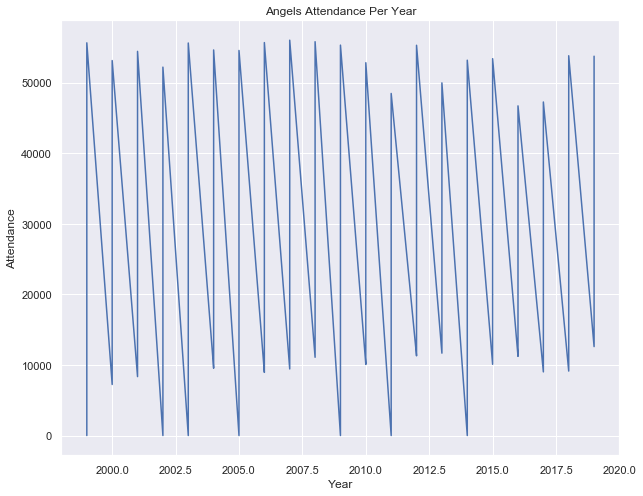

In [185]:
dfints_ana = dfints[dfints['team'].isin(['ANA'])]
sns.set(rc={'figure.figsize':(10,8)})
sns.lineplot(x="year_x", y="att", estimator=None, data = dfints_ana)
plt.title("Angels Attendance Per Year")
plt.xlabel("Year")
plt.ylabel("Attendance")

Text(0, 0.5, 'Number of Hits')

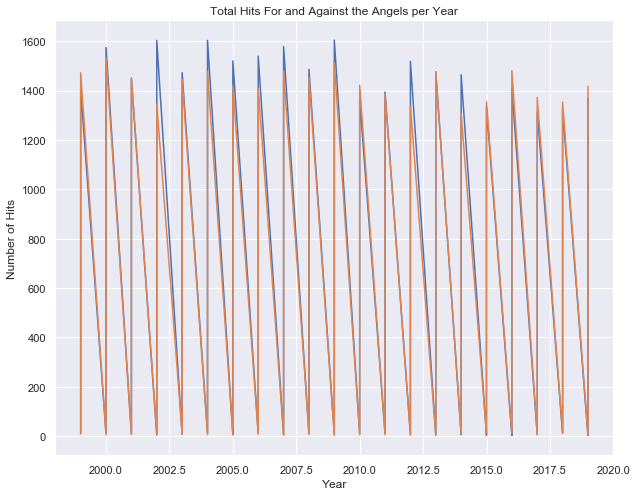

In [188]:
sns.lineplot(x= "year_x" ,y="hits_t", estimator = None, data= dfints_ana)
sns.lineplot(x= "year_x" ,y="hita_t", estimator = None, data= dfints_ana)
plt.title("Total Hits For and Against the Angels per Year")
plt.xlabel("Year")
plt.ylabel("Number of Hits")

Text(0, 0.5, 'Number of Runs')

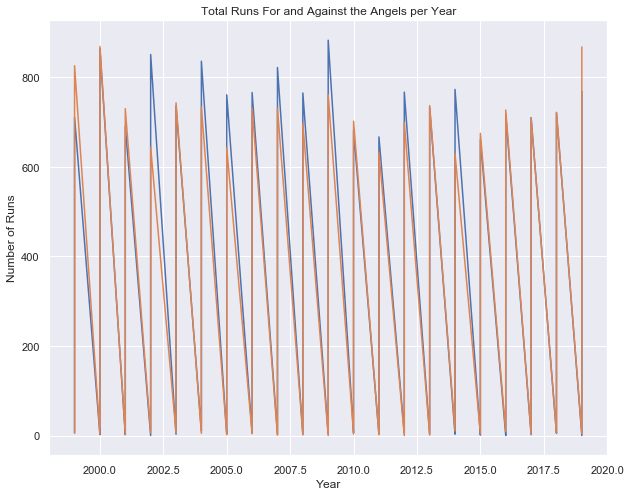

In [187]:
sns.lineplot(x= "year_x" ,y="runs_t", estimator = None, data= dfints_ana)
sns.lineplot(x= "year_x" ,y="runa_t", estimator = None, data= dfints_ana)
plt.title("Total Runs For and Against the Angels per Year")
plt.xlabel("Year")
plt.ylabel("Number of Runs")